# TASK 2

COLOR IDENTIFICATION IN IMAGES

AUTHOR: MRIDULA.S


# IMPORTING LIBRARIES

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# WORKING WITH OPENCV

The type of this input is <class 'numpy.ndarray'>
Shape: (720, 1280, 3)


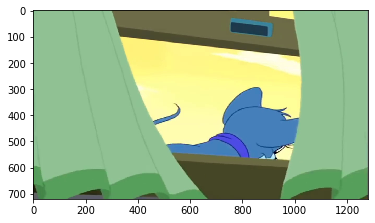

In [3]:
image = cv2.imread('frame1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)



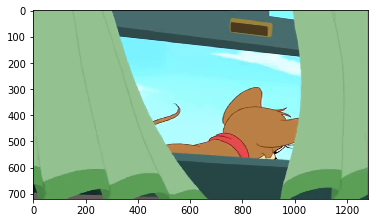

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#Image is converted into grayscale

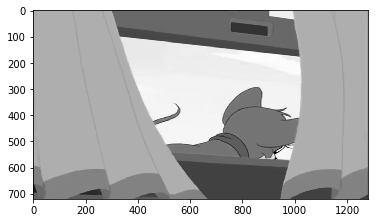

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

#resize the image as required

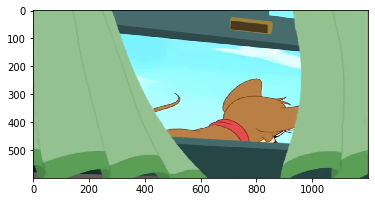

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# COLOR IDENTIFICATION

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors


[array([164.44235937, 252.20391993, 253.16184784]),
 array([ 73.24243391, 106.67274385, 105.47912489]),
 array([146.59771478, 192.53705363, 143.94469621]),
 array([183.55592296, 120.63911127,  68.68969718]),
 array([42.86373489, 70.66807957, 67.41337122]),
 array([ 91.71862224, 156.3670278 ,  87.25679681]),
 array([134.28242182, 247.33641559, 253.82277775]),
 array([219.29506803, 251.17006803, 251.27749433])]

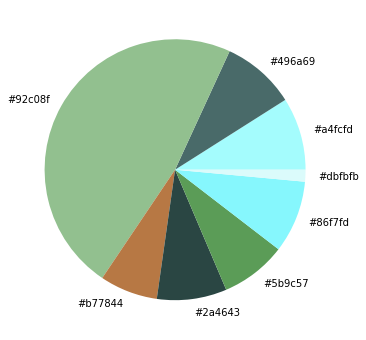

In [10]:
get_colors(get_image('frame1.jpg'), 8, True)

# SEARCHING IMAGES USING COLOR

In [11]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

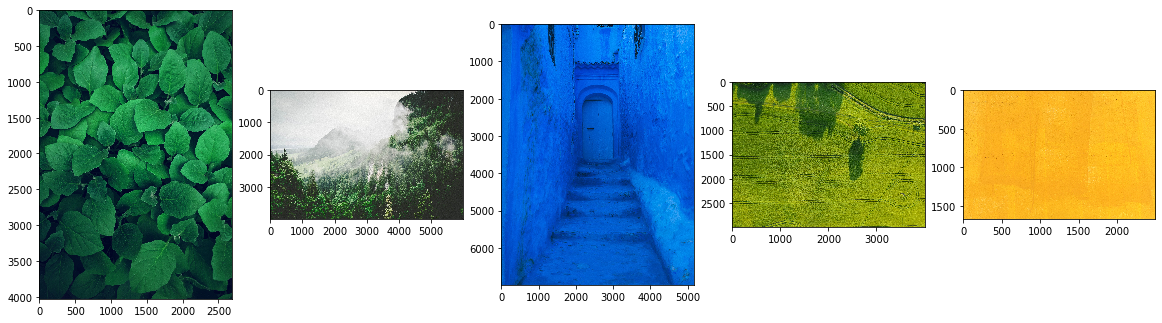

In [12]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [13]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [14]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

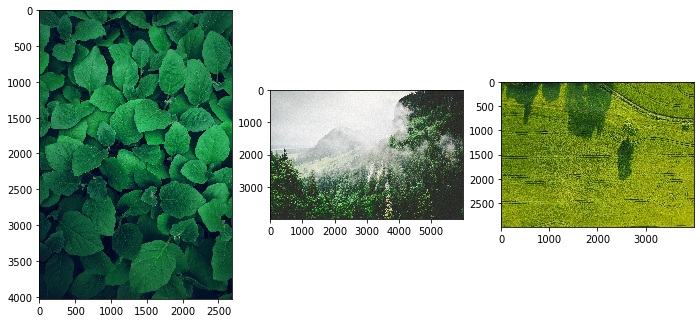

In [16]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['GREEN'], 60, 5)

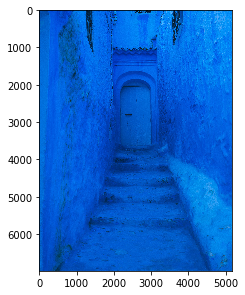

In [17]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['BLUE'] , 60, 5)

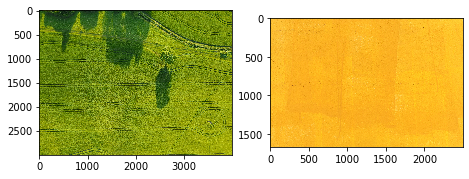

In [19]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['YELLOW'] , 60, 5)